In [2]:
import scanpy.api as sc
import pandas as pd
import loompy
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [3]:
data1_path = './pairwise/t4k.csv'
data2_path = './pairwise/pbmc4k.csv'

In [4]:
data1 = pd.read_csv(data1_path, sep=",")

In [5]:
data2 = pd.read_csv(data2_path, sep=",")

In [6]:
import scanpy.api as sc
import mnnpy

In [7]:
def pandas_into_adata(dataset):
    var_seq = pd.DataFrame(index=dataset.index)
    obs_seq = pd.DataFrame(index=dataset.columns)
    X_seq = dataset.values.T
    adata_seq = ad.AnnData(X_seq, obs=obs_seq, var=var_seq)
    return adata_seq


In [8]:
adata1 = pandas_into_adata(data1)
adata2 = pandas_into_adata(data2)

In [9]:
adata1.X

array([[0.        , 0.30103   , 0.        , ..., 0.30103   , 0.        ,
        0.        ],
       [0.        , 0.        , 0.30103   , ..., 0.        , 0.        ,
        0.30103   ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.30103   , 0.        ,
        0.        ],
       [0.        , 0.        , 0.47712126, ..., 0.        , 0.30103   ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30103   , 0.        ,
        0.30103   ]], dtype=float32)

In [10]:
%%time
corrected = mnnpy.mnn_correct(adata1, adata2,  batch_categories = ["N0123X", "N0124X"], k=50, sigma= 0.5)
adata = corrected[0]

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
CPU times: user 15min 39s, sys: 3min 27s, total: 19min 7s
Wall time: 7min 3s


In [11]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'

In [26]:
adata.X

array([[-0.28753668,  2.972196  , -1.0391207 , ...,  0.08719411,
        -0.44516778, -0.37272578],
       [-0.28753668, -0.26958093,  0.3464407 , ..., -1.2505347 ,
        -0.44516778,  2.1388662 ],
       [-0.28753668, -0.26958093, -1.0391207 , ..., -1.2505347 ,
        -0.44516778, -0.37272578],
       ...,
       [-0.51008767, -0.4106445 ,  0.11566871, ...,  0.27536592,
         1.4661589 , -0.56764436],
       [-0.51617527, -0.4128253 , -0.83800054, ..., -1.1820356 ,
        -0.4105222 , -0.5713652 ],
       [ 1.8238287 ,  2.7750854 ,  0.577553  , ..., -1.1687223 ,
        -0.40240866, -0.6177712 ]], dtype=float32)

         Falling back to preprocessing with `sc.pp.pca` and default params.


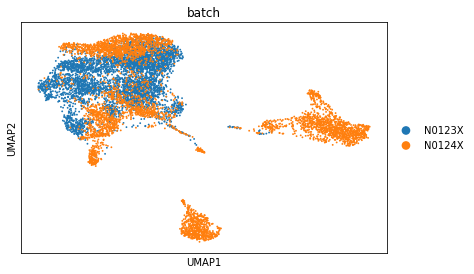

In [12]:
sc.pp.scale(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='batch')

In [13]:
adata

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'
    uns: 'neighbors', 'batch_colors'
    obsm: 'X_pca', 'X_umap'

In [14]:
sc.pp.pca(adata)

In [21]:
%%time
sc.tl.tsne(adata, n_pcs=50)

CPU times: user 5min 34s, sys: 31.2 s, total: 6min 5s
Wall time: 5min 49s


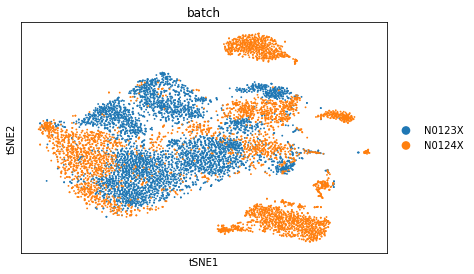

In [22]:
sc.pl.tsne(adata, color='batch')

In [17]:
adata.obsm.X_pca.shape

(8878, 50)

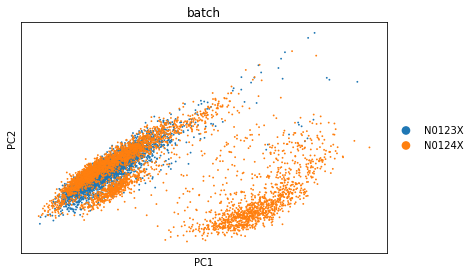

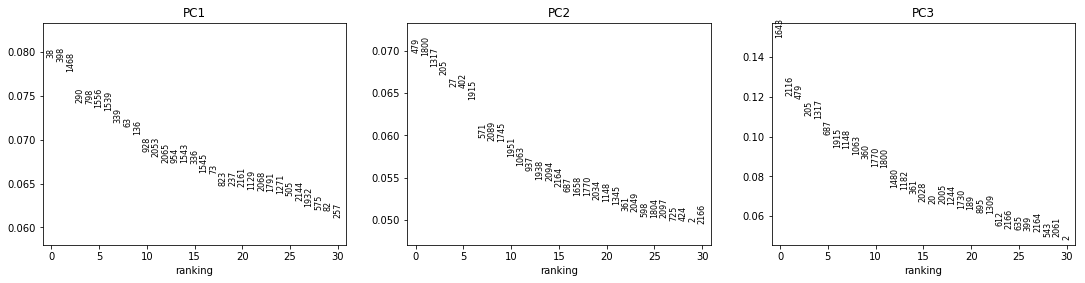

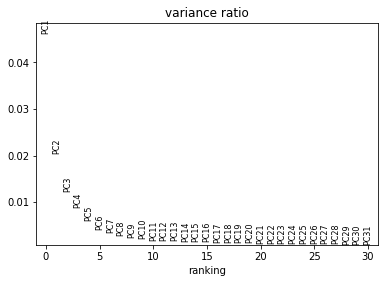

In [18]:
sc.pl.pca(adata, color='batch')